# Training and visualizing a decision tree

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris,y_iris)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


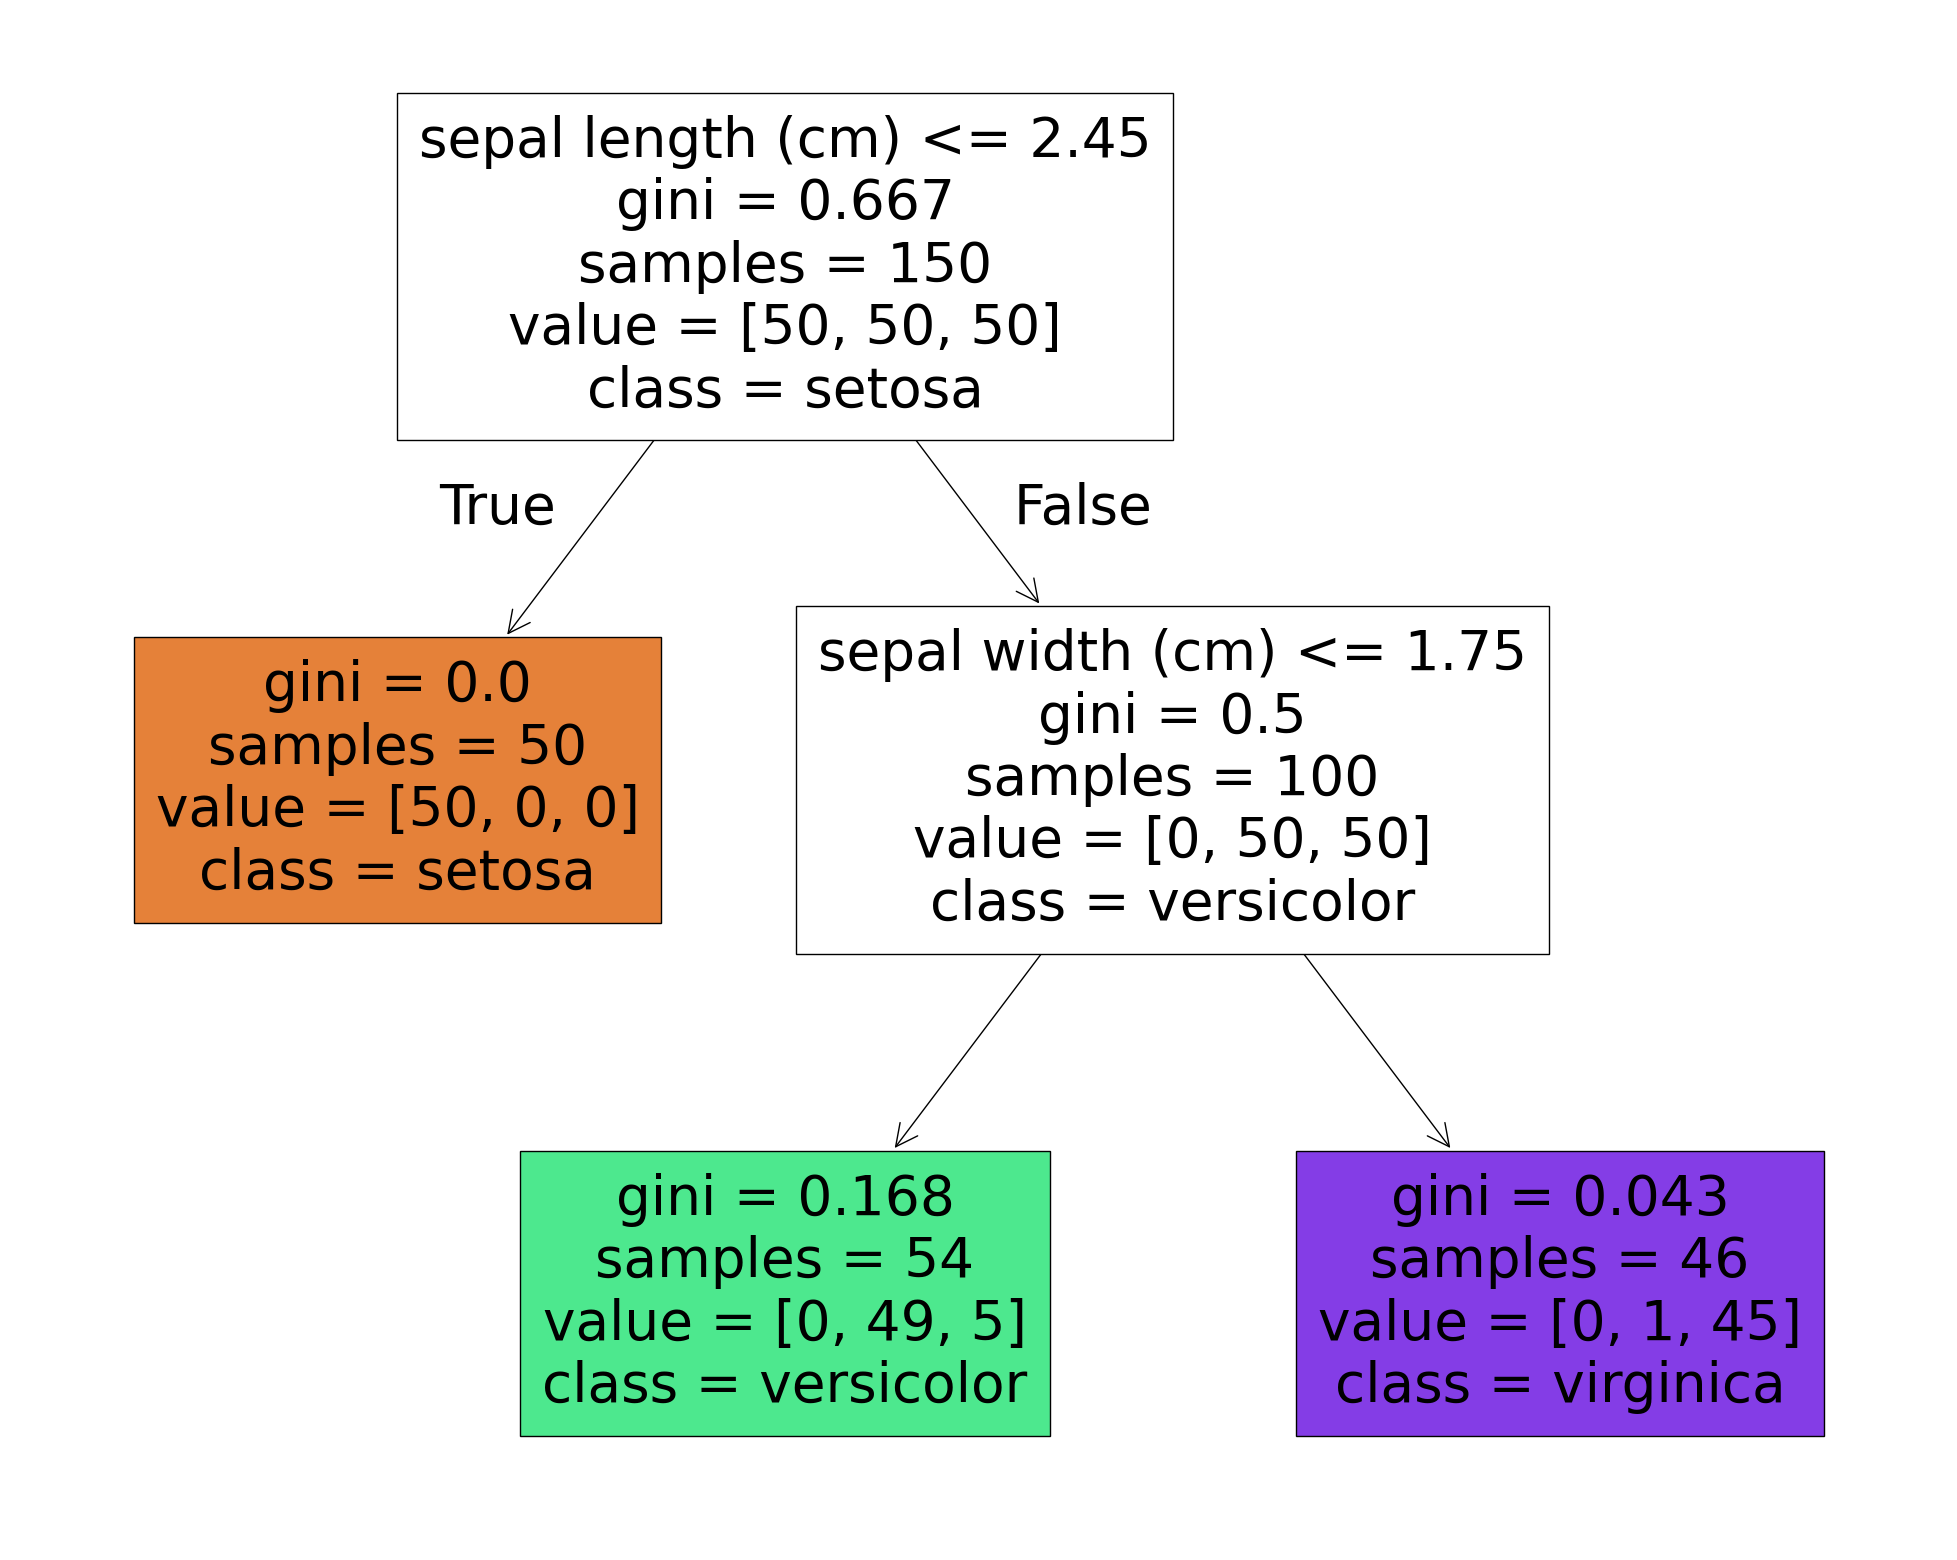

In [12]:
# visualize

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [15]:
# estimating class probability
print(tree_clf.predict_proba([[5, 1.5]]).round(3))
print(tree_clf.predict([[5, 1.5]]))

[[0.    0.907 0.093]]
[1]


# Regression

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


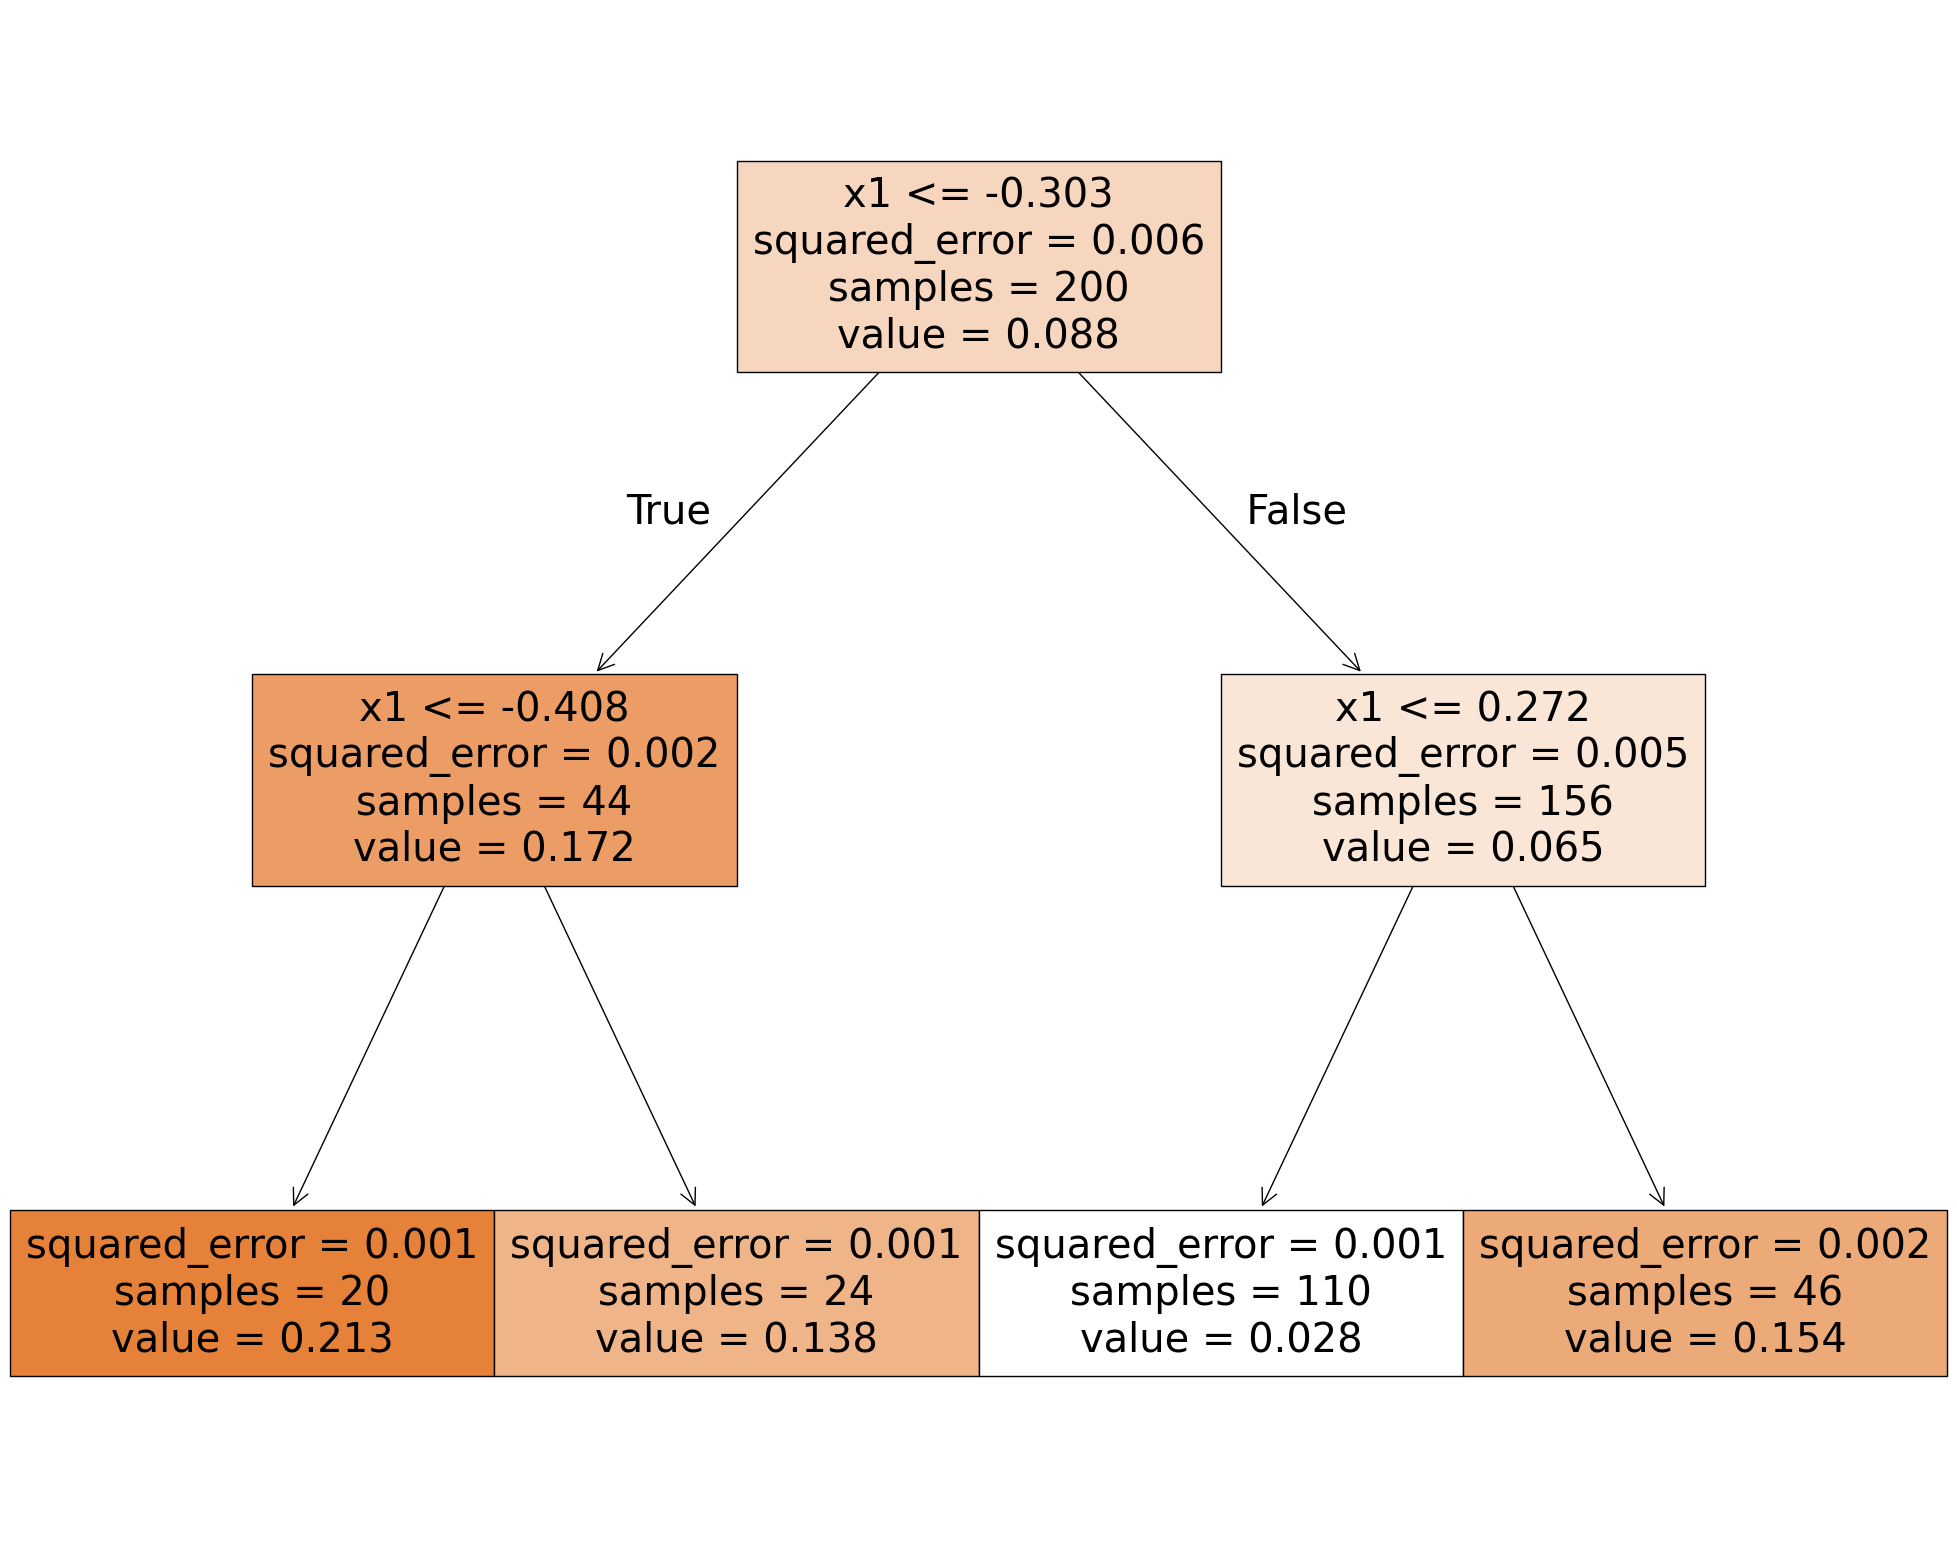

In [ ]:
# visualize
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg,
                   feature_names=["x1"],
                   filled=True)

# Decision tree on moon dataset

In [23]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [24]:
# splitting set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons,
                                                    y_moons,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [26]:
# finding good hyperparameters

from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes' : list(range(2, 100)),
    'max_depth' : list(range(1,7)),
    'min_samples_split': [2,3,4]
}

grid_search_cv = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    cv=3
)

grid_search_cv.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [1, 2, ...], 'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [27]:
# training with best found hyperparameters

from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)     # default it rememebers best found. so no need to do it again

# performance on test set
accuracy_score(y_test, y_pred)


0.8595